In [26]:
import zipfile
import os
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization,Dropout,Flatten,Conv2D,MaxPooling2D

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Navigate to your dataset in Google Drive
dataset_path = '/content/drive/MyDrive/Human_Action_Recognition.zip'

# Extract the dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')

dataset_path = '/content/dataset/'
print("Root contents:", os.listdir(dataset_path))

# Explore the structured folder
structured_path = '/content/dataset/Structured'
print("\nStructured folder contents:", os.listdir(structured_path))

# Check train and test folders
train_path = os.path.join(structured_path, 'train')
test_path = os.path.join(structured_path, 'test')

print(f"\nTrain folder contents: {os.listdir(train_path)}")
print(f"Test folder contents: {os.listdir(test_path)}")

Root contents: ['Structured']

Structured folder contents: ['test', 'train']

Train folder contents: ['running', 'clapping', 'calling', 'cycling', 'hugging', 'texting', 'using_laptop', 'sitting', 'eating', 'drinking', 'fighting', 'sleeping', 'dancing', 'laughing', 'listening_to_music']
Test folder contents: ['running', 'clapping', 'calling', 'cycling', 'hugging', 'texting', 'using_laptop', 'sitting', 'eating', 'drinking', 'fighting', 'sleeping', 'dancing', 'laughing', 'listening_to_music']


In [29]:
def create_action_recognition_dataset():
    structured_path = '/content/dataset/Structured'
    train_path = os.path.join(structured_path, 'train')
    test_path = os.path.join(structured_path, 'test')

    # Automatically discover class names from train folder
    CLASS_NAMES = sorted(os.listdir(train_path))
    print("Discovered action classes:", CLASS_NAMES)

    # Create datasets using Keras - this is much simpler!
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        train_path,
        labels='inferred',
        label_mode='int',
        class_names=CLASS_NAMES,
        image_size=(128, 128),
        batch_size=32,
        shuffle=True
    )

    test_dataset = tf.keras.utils.image_dataset_from_directory(
        test_path,
        labels='inferred',
        label_mode='int',
        class_names=CLASS_NAMES,
        image_size=(128, 128),
        batch_size=32,
        shuffle=False
    )

    return train_dataset, test_dataset, CLASS_NAMES

# Create the datasets
train_dataset, test_dataset, CLASS_NAMES = create_action_recognition_dataset()

print(f"\nDataset created successfully!")
print(f"Number of classes: {len(CLASS_NAMES)}")
print(f"Classes: {CLASS_NAMES}")
print(f"Train batches: {len(train_dataset)}")
print(f"Test batches: {len(test_dataset)}")

Discovered action classes: ['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop']
Found 10710 files belonging to 15 classes.
Found 1890 files belonging to 15 classes.

Dataset created successfully!
Number of classes: 15
Classes: ['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop']
Train batches: 335
Test batches: 60


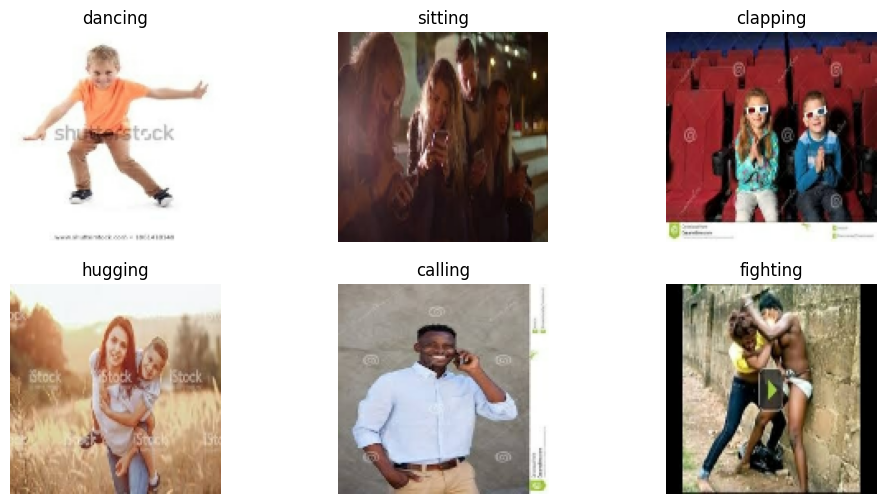

In [30]:
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(12, 6))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASS_NAMES[labels[i]])
        plt.axis('off')
    plt.show()

In [31]:
def plot_training(history):
    """Simple plot function"""
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('Loss')
    plt.legend()

    plt.show()

In [32]:
def train_action_recognition():
    train_dataset, test_dataset, CLASS_NAMES = create_action_recognition_dataset()

    print(f"Training model for {len(CLASS_NAMES)} action classes")
    print(f"Training samples: {len(train_dataset) * 32}")
    print(f"Testing samples: {len(test_dataset) * 32}")

    model=Sequential([

        # First Conv Block:
        Conv2D(32,(3,3),input_shape=(128,128,3),activation="relu"),
        MaxPooling2D((2,2)),

        # Second Conv Block:
        Conv2D(64,(3,3),activation="relu"),
        MaxPooling2D((2,2)),

        # Third Conv Block:
        Conv2D(128,(3,3),activation="relu"),
        MaxPooling2D((2,2)),

        Flatten(),

        #Layer 1
        Dense(64),
        BatchNormalization(),
        Activation("relu"),
        Dropout(0.5),

        #Layer 2
        Dense(128),
        BatchNormalization(),
        Activation("relu"),
        Dropout(0.5),

        #OutputLayer
        Dense(len(CLASS_NAMES),activation="softmax")
    ])

    model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    model.summary()

    history=model.fit(train_dataset,validation_data=test_dataset,epochs=10)

    plot_training(history)
    return history, model

Discovered action classes: ['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating', 'fighting', 'hugging', 'laughing', 'listening_to_music', 'running', 'sitting', 'sleeping', 'texting', 'using_laptop']
Found 10710 files belonging to 15 classes.
Found 1890 files belonging to 15 classes.
Training model for 15 action classes
Training samples: 10720
Testing samples: 1920


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,709,967 (6.52 MB)

 Trainable params: 1,709,583 (6.52 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.0870 - loss: 3.1093 - val_accuracy: 0.0799 - val_loss: 3.1360
Epoch 2/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.1446 - loss: 2.6160 - val_accuracy: 0.1704 - val_loss: 2.4518
Epoch 3/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2075 - loss: 2.4341 - val_accuracy: 0.2101 - val_loss: 2.3703
Epoch 4/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.2348 - loss: 2.3243 - val_accuracy: 0.3243 - val_loss: 2.1245
Epoch 5/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.2776 - loss: 2.2057 - val_accuracy: 0.3032 - val_loss: 2.1530
Epoch 6/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.3010 - loss: 2.1358 - val_accuracy: 0.3042 - val_loss: 2.0844
Epoch 7/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.3449 - loss: 2.0240 - val_accuracy: 0.2704 - val_loss: 2.2291
Epoch 8/10
335/335 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.3736 - loss: 1.9303 - val_ac

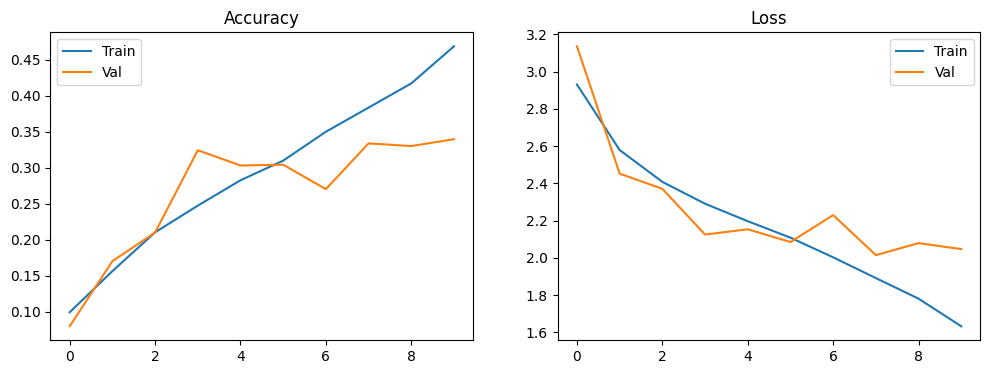

Final training accuracy: 0.4687
Final validation accuracy: 0.3397


In [33]:
def main():

  history, model = train_action_recognition()

  print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
  print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")

if __name__ == "__main__":
    main()